In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


Data Understanding

In [12]:
df=pd.read_csv('Advertising.csv')
df.head()

TV  radio  newspaper  sales
0  230100  37800      69200  22100
1   44500  39300      45100  10400
2   17200  45900      69300   9300
3  151500  41300      58500  18500
4  180800  10800      58400  12900

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Creating  total_spend column 

In [14]:
df['total_spend']=df['TV'] +df['radio']+ df['newspaper']
df.head()

TV  radio  newspaper  sales  total_spend
0  230100  37800      69200  22100       337100
1   44500  39300      45100  10400       128900
2   17200  45900      69300   9300       132400
3  151500  41300      58500  18500       251300
4  180800  10800      58400  12900       250000

In [15]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)

# Exploratory  Data  Analysis(EDA)

In [16]:
df.describe()

sales    total_spend
count    200.000000     200.000000
mean   14022.500000  200860.500000
std     5217.456566   92985.180587
min     1600.000000   11700.000000
25%    10375.000000  123550.000000
50%    12900.000000  207350.000000
75%    17400.000000  281125.000000
max    27000.000000  433600.000000

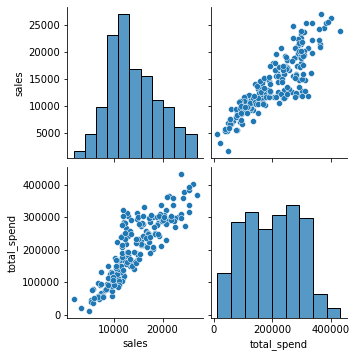

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
df.corr()

sales  total_spend
sales        1.000000     0.867712
total_spend  0.867712     1.000000

# Data  Cleaning

In [19]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

# Train Test Split

In [20]:
x=df.drop(columns='sales')
y=df['sales']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

# Modelling 

In [22]:
#import
from sklearn.linear_model import LinearRegression

In [23]:
#Save the model
model=LinearRegression()

In [24]:
#fit
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.coef_

array([0.04895385])

In [31]:
train_predictions=model.predict(x_train)

In [29]:
test_predictions=model.predict(x_test)

# Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error
print('MAE for test data:',mean_absolute_error(y_test,test_predictions))
print('MAE for train data:',mean_absolute_error(y_train,train_predictions))

MAE for test data: 1914.3627368130553
MAE for train data: 1963.9767578200754


In [34]:
from sklearn.metrics import mean_squared_error
print('MSE for test data:',mean_squared_error(y_test,test_predictions))
print('MSE for train data:',mean_squared_error(y_train,train_predictions))

MSE for test data: 6415866.312543215
MSE for train data: 6811655.464246886


In [35]:

print('RMSE for test data:',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE for train data:',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data: 2532.956042362997
RMSE for train data: 2609.9148385046756


In [36]:
from sklearn.metrics import r2_score
print('R2 for test data:',r2_score(y_test,test_predictions))
print('R2 for test data:',r2_score(y_train,train_predictions))

R2 for test data: 0.7650262463310724
R2 for test data: 0.7404192834391545


In [38]:
#Test R_square
model.score(x_test,y_test)

0.7650262463310724

# Checklist

IS test accuracy= Cross validation Score

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(scores)

cv_score=scores.mean()
print('cross validation score:',cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.7433783178555419


# Linearity of Errors

In [46]:
test_res=y_test-test_predictions

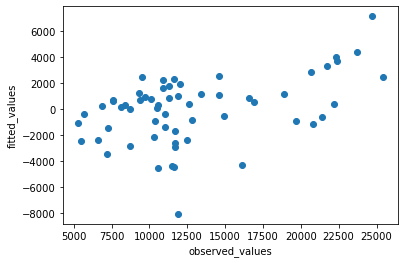

In [47]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

# Normality of Errors 

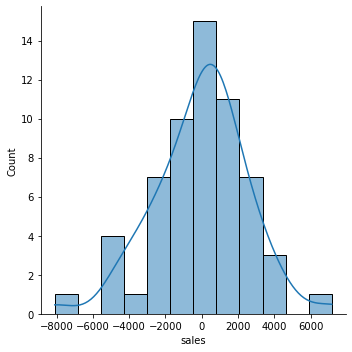

In [48]:
sns.displot(test_res,kde=True)
plt.show()

# Homoscadesicity

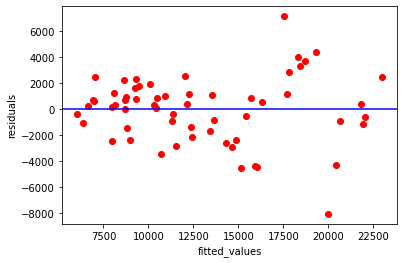

In [50]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

# Variable significance

In [52]:
import statsmodels.formula.api as smf
mode12=smf.ols('y~x',data=df).fit()
mode12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           5.06e-62
Time:                        23:14:23   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final inference

In [53]:
model.predict([[400000]])

C:\Users\Atul Deshmukh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23780.64568165])

# Save and load model

In [54]:
from joblib import dump

In [55]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

In [56]:
from joblib import load

In [59]:
loaded_model=load('sales_model.joblib')

In [61]:
loaded_model.predict([[700000]])

C:\Users\Atul Deshmukh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38466.80006723])